Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [12]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

Ensuring that in future observations we dont have any truncated information being displayed in our jupter notebook

In [14]:
df.drop("Loan_ID",axis=1,inplace=True)

I am dropping the loan_id columnsince its feel much useless

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


We can see that 4 columns float data type ,1 column data type, 7 columns object data type 

In [17]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Data Type Columns are: ",object_datatype) 


number_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x]=='int64':
        number_datatype.append(x)
print(f"\nNumber Data Type Columns are: ",number_datatype)

Object Data Type Columns are:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Number Data Type Columns are:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


we have successfully bifurcated the object data type column names and numeric data types columns name.

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


Using the describe method we can take a look at the numerical data type columns and observe the distribution of float and integer data amongst them.

In [20]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

With the help of isna method we are able to determine the columns that have missing data in them which will need to be treated.

<AxesSubplot:>

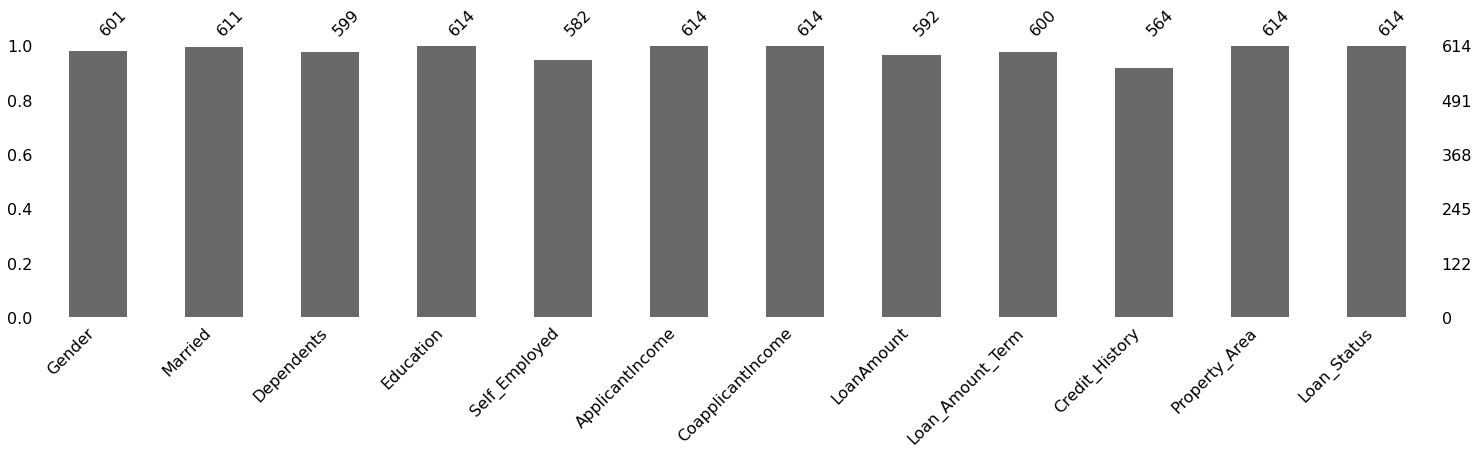

In [21]:
missingno.bar(df, figsize=(25,5))

we are able to decipt the missing values information in a bar plot format where we can see that there are null datapresent in below columns.

In [22]:
print(f"Rows and Columns before dropping duplicates:",df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates:",df.shape)

Rows and Columns before dropping duplicates: (614, 12)
Rows and Columns after dropping duplicates: (614, 12)


With the drop duplicates option we can always get rid of duplicate data especially on large dataset.

In [23]:
df.nunique().to_frame("Unique Values")

,Unique Values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


The nunique method lists down the number of all the unique data present in each column of our dataset

In [24]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts())
    print("="*120)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


In the above cell we are taking a look at all the unique values of object data type columns . while eye balling the values we were able to see the categories in each columns and the numbers of rows that cover those data in our entire dataframe.

FILLING ALL THE MISSING VALUES AND TREATING THEM WITH MEAN AND MODE

In [25]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

I have filled all the missing values in continous data columns using the mean value of those columns and all the missing data
in categorical columns with the mode of those columns.

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that all the missing data has been filled successfully into our dataset.

VISUALIZATION

In [28]:
print(f"Object Data Type Columns Names:",object_datatype)
print(f"\nNumeric Data Type Columns Names:",number_datatype)

Object Data Type Columns Names: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Numeric Data Type Columns Names: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


Listing out the columns names for object datatype and numeric datatype 

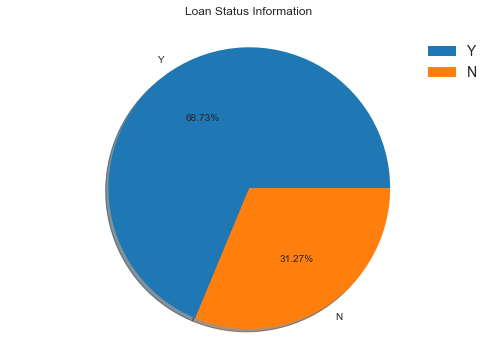

In [29]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(),labels=df['Loan_Status'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that our target label has 68.73% of loan approved status while 31.27 % of loan rejection status.

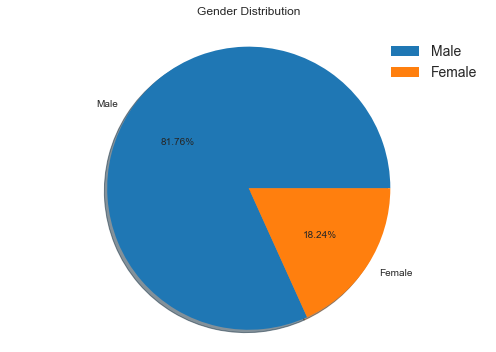

In [30]:
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that the number of males cover 81.76% of the rows in gender column while females cover only 18.24% of rows. 

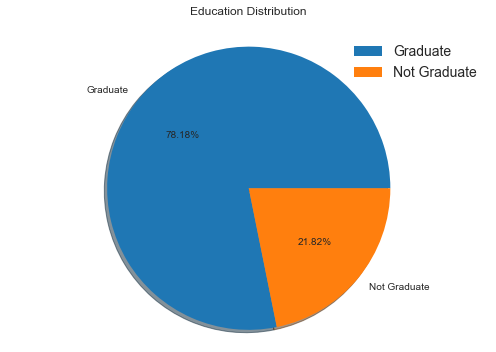

In [31]:
plt.figure(figsize=(7,5))
plt.pie(df['Education'].value_counts(),labels=df['Education'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that 78.18% of rows present in education column are filled with graduates while the remaining 21.82% rows are filled with under graduate people.

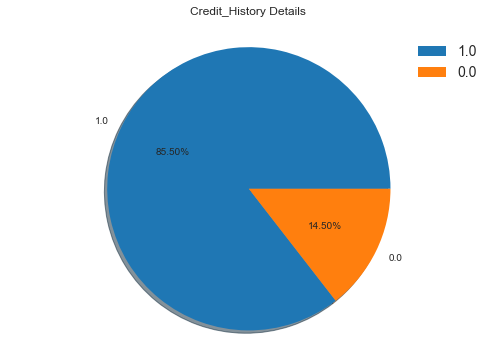

In [32]:
plt.figure(figsize=(7,5))
plt.pie(df['Credit_History'].value_counts(),labels=df['Credit_History'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Credit_History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that 1.0 represents the credit history is available and 0.0 represents that credit history is not available .for 85.50% of people we have the credit history information available while 14.50% people do not have any credit history. 

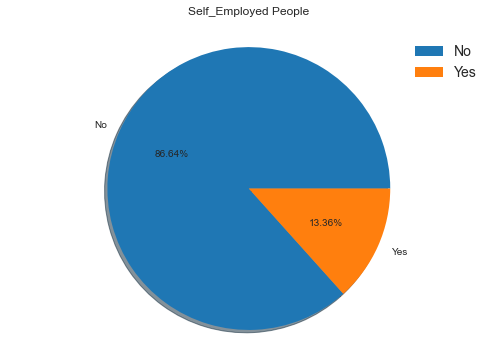

In [33]:
plt.figure(figsize=(7,5))
plt.pie(df['Self_Employed'].value_counts(),labels=df['Self_Employed'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Self_Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that 86.64% people are not self employed and might be working with either private or goverment 
sectors while only 13.36% people are self employed.

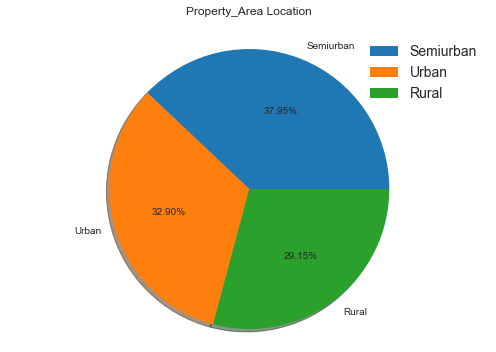

In [34]:
plt.figure(figsize=(7,5))
plt.pie(df['Property_Area'].value_counts(),labels=df['Property_Area'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Property_Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that 37.95% rows are covered by semi urban area type ,32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type in our property area column

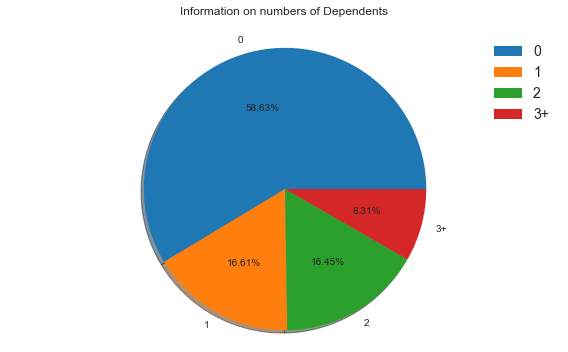

In [35]:
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(),labels=df['Dependents'].value_counts().index,
       shadow=True, autopct='%1.2f%%')
plt.title('Information on numbers of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

In the above pie plot we can see that the total numbers were 58.63% rows are covered with the people having 0 dependents ,16.45% rows are covered with people having 1 dependents 16.45% rows covered with people having 2 dependents and 8.31% rows are covered with people having 3 or more dependents.

Error: '12.0'


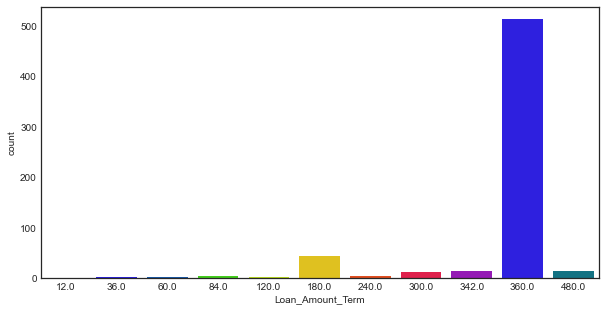

In [36]:
try:
    plt.figure(figsize=(10,5))
    col_name = 'Loan_Amount_Term'
    values = df[col_name].value_counts()
    index = 0 
    ax = sns.countplot(df[col_name],palette="prism")
    
    for i in ax.get_xticklabels():
        ax.text(index,values[i.get_text()]/2,values[i.get_text()],
               horizontalalignment="center",fontweight='bold',color='w')
        index += 1
    plt.title(f"Count plot for {col_name}\n")
    plt.ylabel(f"Numbers of rows")
    plt.show()
    
except Exception as e:
    print("Error:",e)
    pass

In the above count plot we can see that highest number of rows are covered by the value 360.0 in the loan amount term column

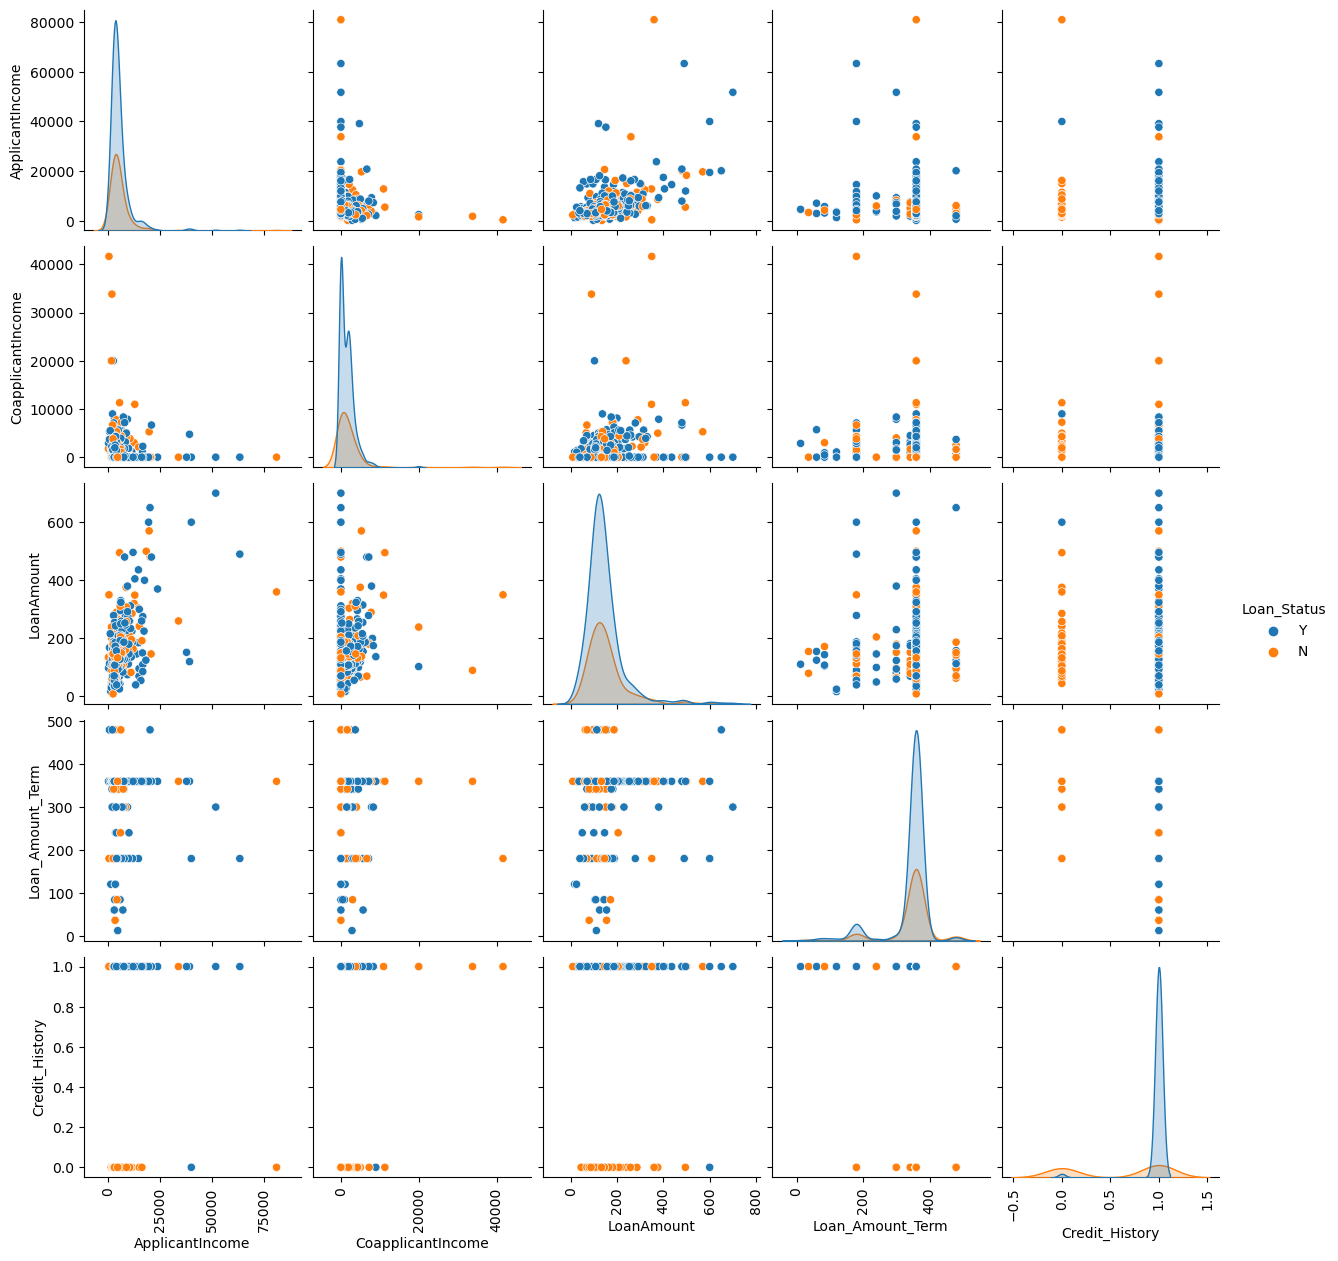

In [40]:
plt.style.use('default')
g = sns.pairplot(df,hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x",labelrotation=90)
plt.show()    

I have generated the above pairplot for our continous data column that shows us how the data points are distributed 
in each of the numeric datatype column.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

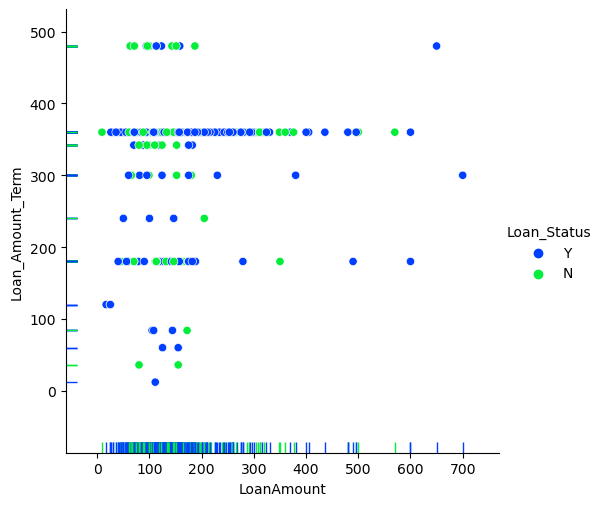

In [41]:
plt.style.use('seaborn-bright')
sns.relplot(data=df, x='LoanAmount',y='Loan_Amount_Term',hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount',y='Loan_Amount_Term',hue='Loan_Status',legend=False)

In the loan amount vs loan amount term plot we can see that most of the data points are accumulated for 180,300,360,480 terms while loan amount ranging from 50-250 for a term of 480 .

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

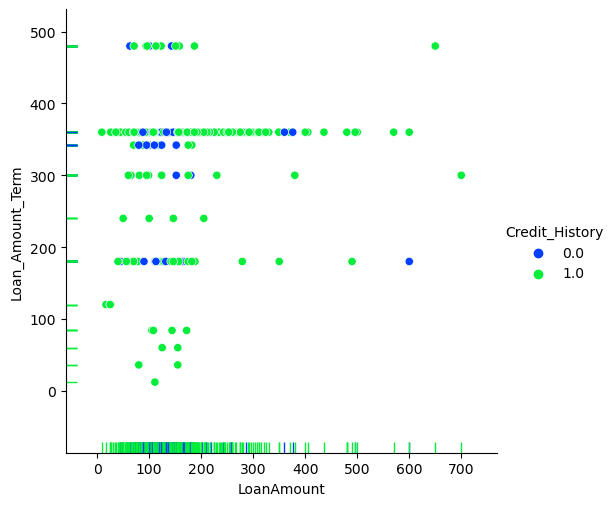

In [42]:
sns.relplot(data=df, x='LoanAmount',y='Loan_Amount_Term',hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount',y='Loan_Amount_Term',hue='Credit_History',legend=False)

In the above plot we can see that loan amount vs loan amount term datapoints most of the values already have a credit history to showcase.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

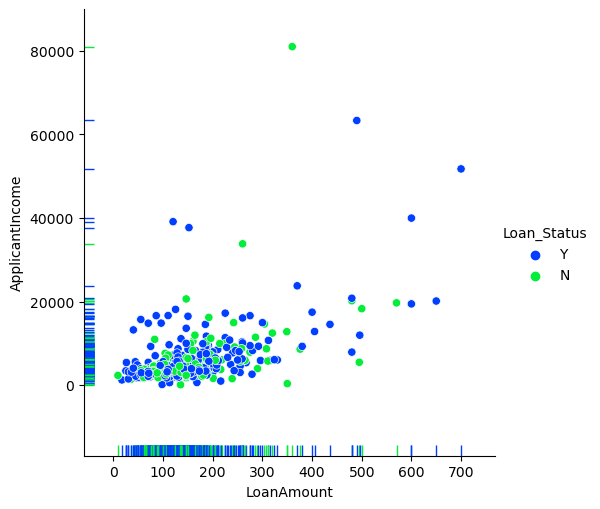

In [43]:
sns.relplot(data=df, x='LoanAmount',y='ApplicantIncome',hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',legend=False)

In the above plot we can see that most of the data points are converged near the range 0 -20000 data for application income for mostly loan amount between 0-400

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

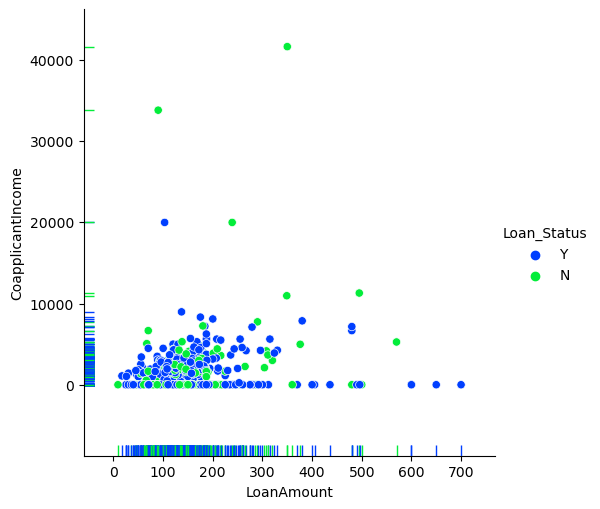

In [44]:
sns.relplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Loan_Status',legend=False)

In the above plot we can see that most of the data points have their credit history available and the values are convergedbetween 0-20000 for application income and 0-400 for loan amount data

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

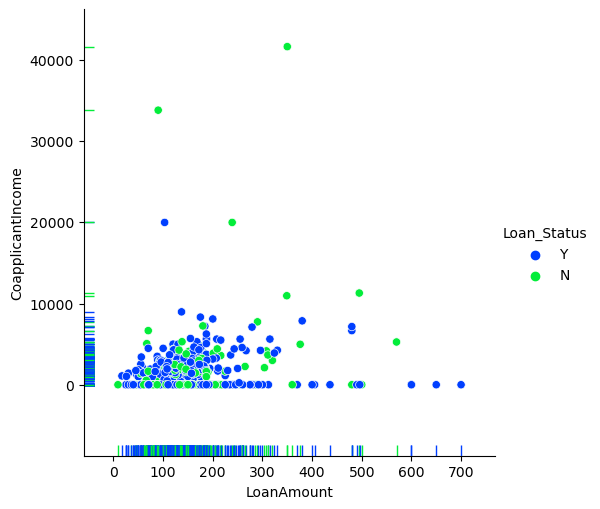

In [45]:
sns.relplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Loan_Status',legend=False)

In the above plot we can see that the applicant income vs loan amount data points where on co applications with higher 
incomes are mostly denied loan where most data values are converged between 1- 10000 for co appliacnt income and 0-300 for loan amount data

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

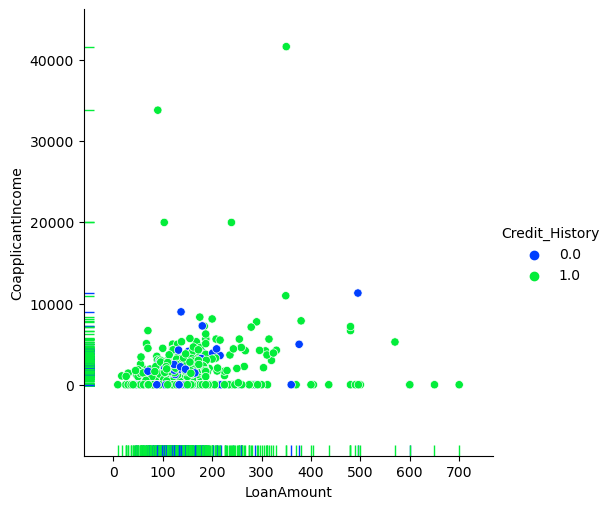

In [46]:
sns.relplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount',y='CoapplicantIncome',hue='Credit_History',legend=False)

In the above plot we can see that most of the data points are accumlated between 0-10000 for coappliacnt income and 0-350 for loan amount data and most of these data points have a credit history available them.

ENCODING THE CATEGORICAL OBJECT DATATYPE COLUMNS

In [47]:
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


I have used labelencoder to convert the object datatype in our label column loan status to a numeric format

In [48]:
oe = OrdinalEncoder()
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married'] = oe.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Education'] = oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Self_Employed'] = oe.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Property_Area'] = oe.fit_transform(df['Property_Area'].values.reshape(-1,1))
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


By using ordinalencoder to ensure that the numbers of columns do not get increased unnecessarily.

In [49]:
print(f"Shape of our data frame post enconding is",df.shape)
df.isnull().sum()

Shape of our data frame post enconding is (614, 12)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Checking there is no null values in the dataset

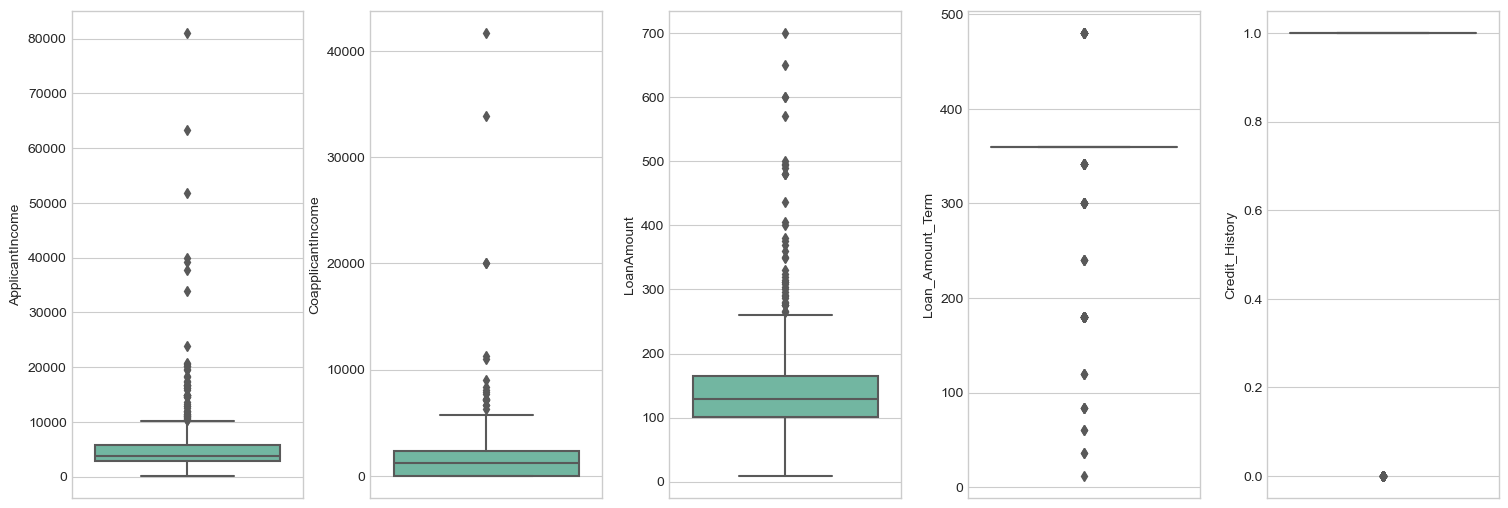

In [50]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set2")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

With the help of boxplot we acn see the outliers details present in our numerical data columns which will need to be treated.

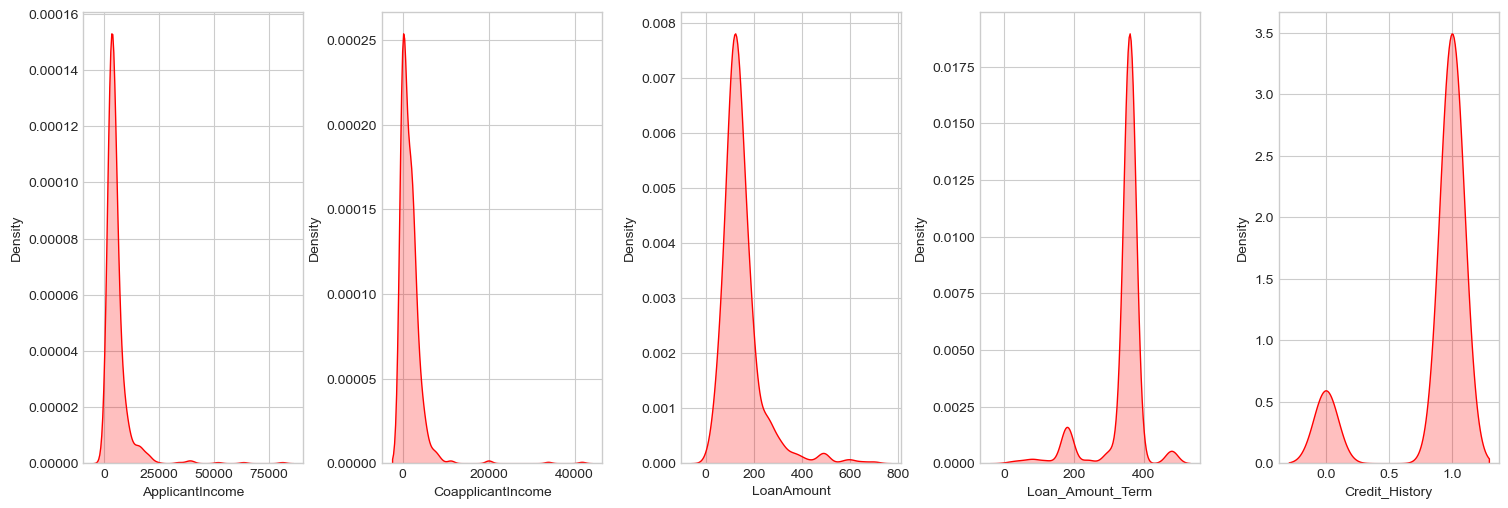

In [52]:
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[number_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade":True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

with the help of distribution plot we can see that skewness details present in our numerical data columns which will need to be treated

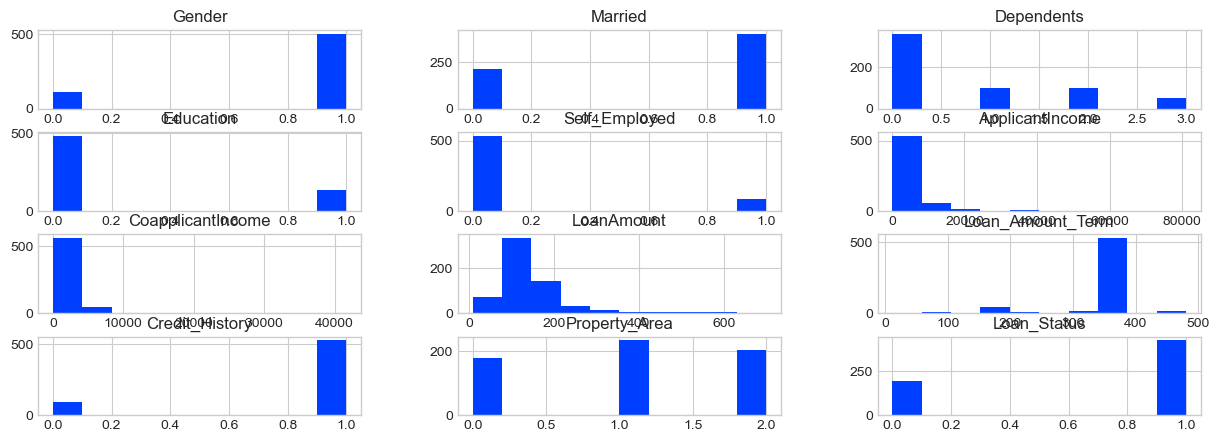

In [53]:
df.hist(figsize=(15,5))
plt.show()

I have generated a histogram for all our dataset columns after applying encoding and converting object datatype to numeric data type values

CORRELATION USING A HEAT MAP 

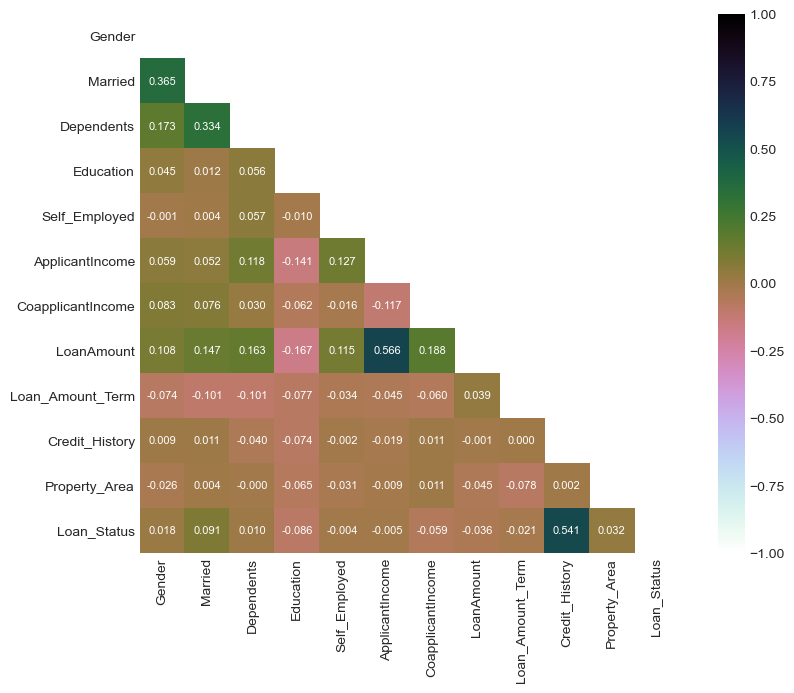

In [54]:
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f',
            annot_kws={'size':8}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In the above heat map we can see that the correlation details plus we can determine that there is no multi colinearity issue between our columns.

CORRELATION BAR PLOT COMPARING FEATURES WITH OUR LABEL 

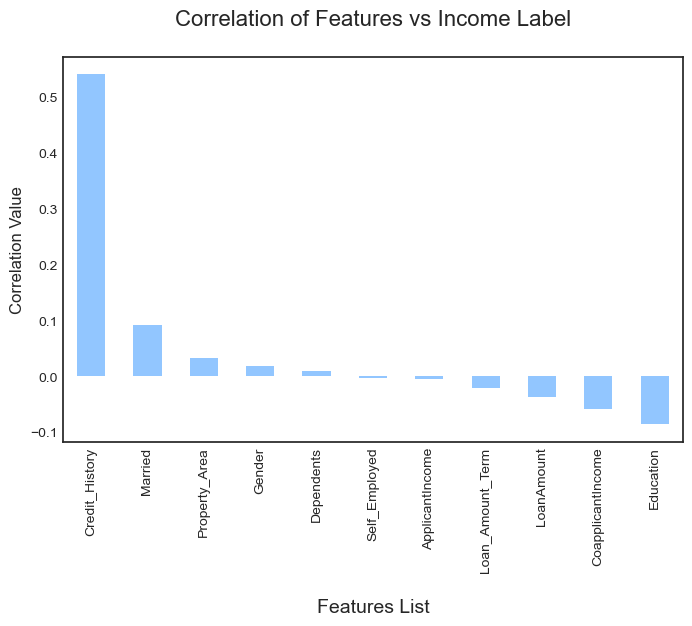

In [55]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(8,5))
df_corr['Loan_Status'].sort_values(ascending=False).drop('Loan_Status').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us aclear picture on positive and negative correlation columns we have generated this

USING Z SCORE TECHNIQUE

In [56]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print("Shape of the dataframe before removing outliers",df.shape)
print("Shape of the dataframe after removing outliers",df1.shape)
print("Percentage of data loss post outliers removal", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers (614, 12)
Shape of the dataframe after removing outliers (577, 12)
Percentage of data loss post outliers removal 6.026058631921824


In [57]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

WITH THE SKEW METHOD we can see that there are columns present in our dataset that are above the accpetable range of +/- 0.5 value

In [58]:
for col in number_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [59]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

after applying logtransformation on our numerical datatype columns to ensure that we do not have skewness in our dtaset

SPLITTING THE DATASET INTO 2 VARIABLES

In [60]:
X = df.drop('Loan_Status', axis=1)
Y = df['Loan_Status']

X represents all the feature columns and Y represents the target columns 

RESOLVING THE CLASS IMBALANCE ISSUE

In [61]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [62]:
oversample = SMOTE()
X , Y = oversample.fit_resample(X,Y)

In [63]:
Y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the update information 

FEATURE SCALING

In [64]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.476449,-1.365019,-0.747278,-0.550806,-0.377428,0.719169,-1.057372,0.376246,0.205653,0.575214,1.264587
1,0.476449,0.775226,0.259163,-0.550806,-0.377428,0.252589,0.848455,0.053528,0.205653,0.575214,-1.293094
2,0.476449,0.775226,-0.747278,-0.550806,2.815689,-0.557907,-1.057372,-1.531084,0.205653,0.575214,1.264587
3,0.476449,0.775226,-0.747278,1.900223,-0.377428,-0.844140,0.964793,-0.101329,0.205653,0.575214,1.264587
4,0.476449,-1.365019,-0.747278,-0.550806,-0.377428,0.767927,-1.057372,0.285770,0.205653,0.575214,1.264587


Finding best random state for building classification model

In [65]:
maxAccu=0
maxRS=0

for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test,pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i
        
print("Best accuracy score is",maxAccu,"on Random State",maxRS)

Best accuracy score is 82.91457286432161 on Random State 657


I have taken 657 amongst range between 1-1000

,Importance
Features,
Credit_History,0.281
ApplicantIncome,0.167
LoanAmount,0.161
CoapplicantIncome,0.097
Property_Area,0.074
Dependents,0.054
Married,0.048
Loan_Amount_Term,0.034
Education,0.032


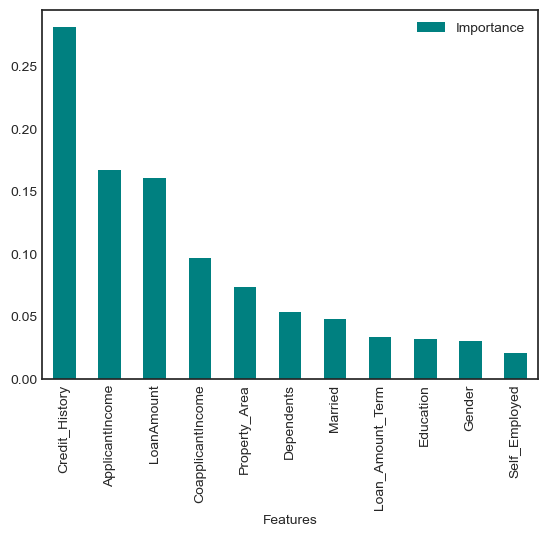

In [66]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'Features':X.columns,'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

Here with the help of randomforest classifier we are able to list down the importance or priority given to a column 
as per its involvement or weightage in predicting our label 

MACHINE LEARNING MODEL FOR CLASSIFICATION WITH EVALUTION METRICS

In [68]:
def classify(model,X,Y):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=657)
    
    model.fit(X_train,Y_train)
    
    pred = model.predict(X_test)
    
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n",class_report)
    
    acc_score = (accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    
    cv_score = (cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [69]:
#Logistic Regression

model=LogisticRegression()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79        92
           1       0.78      0.94      0.86       107

    accuracy                           0.83       199
   macro avg       0.85      0.82      0.82       199
weighted avg       0.84      0.83      0.83       199

Accuracy Score: 82.91457286432161
Cross Validation Score: 73.87499999999999

Accuracy Score - Cross Validation Score is 9.039572864321627


In [70]:
#support vector classifier

model=SVC(C=1.0,kernel='rbf',gamma='auto',random_state=42)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        92
           1       0.81      0.90      0.85       107

    accuracy                           0.83       199
   macro avg       0.83      0.82      0.83       199
weighted avg       0.83      0.83      0.83       199

Accuracy Score: 82.91457286432161
Cross Validation Score: 77.14072327044026

Accuracy Score - Cross Validation Score is 5.773849593881351


In [71]:
#DecisionTreeClassifier


model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        92
           1       0.85      0.75      0.80       107

    accuracy                           0.79       199
   macro avg       0.80      0.80      0.79       199
weighted avg       0.80      0.79      0.79       199

Accuracy Score: 79.39698492462311
Cross Validation Score: 74.75707547169812

Accuracy Score - Cross Validation Score is 4.6399094529249965


In [72]:
#RandomForestClassifier


model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86        92
           1       0.87      0.91      0.89       107

    accuracy                           0.87       199
   macro avg       0.88      0.87      0.87       199
weighted avg       0.87      0.87      0.87       199

Accuracy Score: 87.43718592964824
Cross Validation Score: 84.937106918239

Accuracy Score - Cross Validation Score is 2.500079011409241


In [73]:
#KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        92
           1       0.80      0.83      0.82       107

    accuracy                           0.80       199
   macro avg       0.80      0.80      0.80       199
weighted avg       0.80      0.80      0.80       199

Accuracy Score: 79.89949748743719
Cross Validation Score: 74.50157232704402

Accuracy Score - Cross Validation Score is 5.3979251603931715


In [74]:
#ExtraTreesClassifier
model=ExtraTreesClassifier()
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        92
           1       0.86      0.87      0.87       107

    accuracy                           0.85       199
   macro avg       0.85      0.85      0.85       199
weighted avg       0.85      0.85      0.85       199

Accuracy Score: 85.42713567839196
Cross Validation Score: 85.06053459119497

Accuracy Score - Cross Validation Score is 0.36660108719699736


In [75]:
#XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,X,Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        92
           1       0.84      0.79      0.82       107

    accuracy                           0.81       199
   macro avg       0.81      0.81      0.81       199
weighted avg       0.81      0.81      0.81       199

Accuracy Score: 80.90452261306532
Cross Validation Score: 81.92610062893083

Accuracy Score - Cross Validation Score is -1.0215780158655008


Hyper parameter tuning on the classification ml model

In [76]:
fmod_param = {'criterion' : ['gini', 'entropy'],
             'n_jobs':[-2, -1, 1],
             'random_state':[42, 657, 1000],
             'max_depth':[0, 15, 30],
             'n_estimators':[100, 200, 300] 
             }

After comparing all the classification models i have selected extra trees classifier as my best model

In [77]:
GSCV = GridSearchCV(ExtraTreesClassifier(),fmod_param,cv=5)

I have using GridSearchCV method for hyper parametertuning my best model

In [78]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 657, 1000]})

I have trained the GridSearchCV with the list of parameters i feel it should check for best possible results.

In [79]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 1000}

GridSearchCV has provided me with the best parameters list out of the all the combinations it used to train the model

In [80]:
Final_Model = ExtraTreesClassifier(criterion='entropy',max_depth=30,n_estimators=100,n_jobs=-2,random_state=1000)
Classifier = Final_Model.fit(X_train,Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test,fmod_pred))*100
print("Accuracy score for the Best Model is:",fmod_acc)

Accuracy score for the Best Model is: 83.91959798994975


I have successful incorporated the hyper parameter tuning on my final model and received the accuracy score for it

AUC RUC CURVE

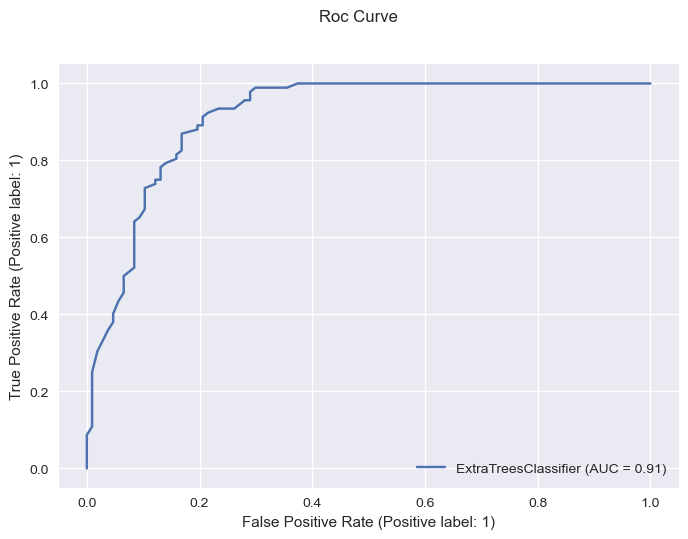

In [81]:
plt.style.use('seaborn')
disp=metrics.plot_roc_curve(Final_Model,X_test,Y_test)
disp.figure_.suptitle("Roc Curve")
plt.show()

I have generated the ROC curve for my final model and its shows the auc score for my final model is 91%

CONFUSION MATRIX

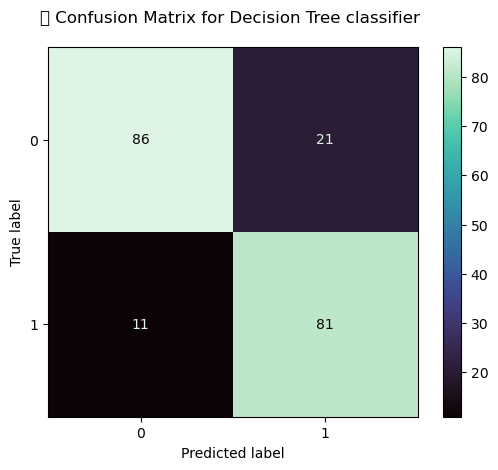

In [82]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier,X_test,Y_test,cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree classifier \n')
plt.show()

With the help of confusion matrix i am able to understand the numbers of times i got correct outputs.

SAVING THE MODEL

In [83]:
filename = "FinalModel_E06.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_E06.pkl']

FINALLY I SAVING MY BEST CLASSIFICATION MODEL USING THE JOBLIB LIBRARY